In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import my_tools as tools

df_cases_new = pd.read_csv('data/cases_new.csv').set_index('Date')
df_cases_new.name= 'New cases'
df_cases_total = pd.read_csv('data/cases_total.csv').set_index('Date')
df_cases_total.name = 'Total cases'

df_deaths_new = pd.read_csv('data/deaths_new.csv').set_index('Date')
df_deaths_new.name = 'New deaths'
df_deaths_total = pd.read_csv('data/deaths_total.csv').set_index('Date')
df_deaths_total.name = 'Total deaths'

df_cases_relative = pd.read_csv('data/cases_relative.csv').set_index('Date')
df_cases_relative.name = 'New deaths'

In [12]:
countries = df_cases_new.columns
current_populations = df_population.loc[countries, '2020']

assert(len(countries) == len(current_populations))

In [13]:
df_cases_relative = df_cases_total.copy()
df_cases_relative.name = 'Percent of population expected infected'

for country in df_cases_relative.columns:
    df_cases_relative[country] = df_cases_relative[country] / current_populations[country]

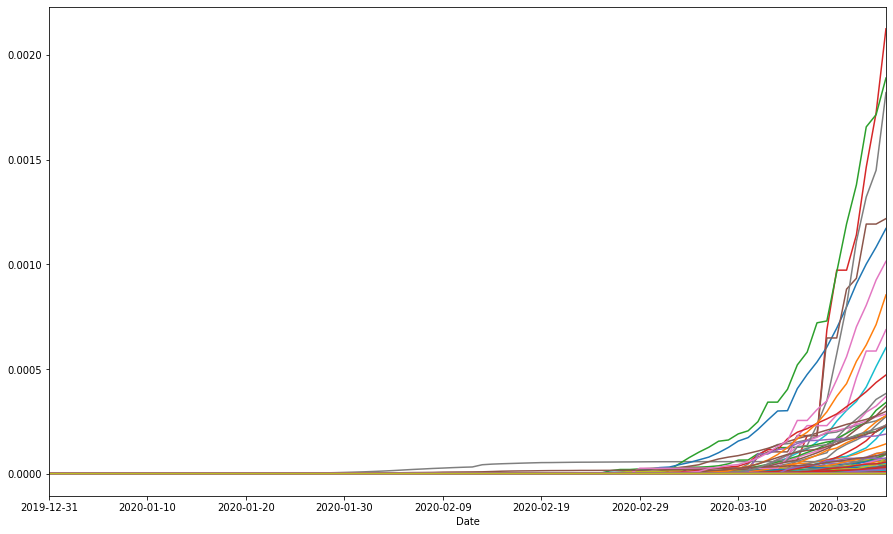

In [16]:
df_cases_relative.plot(figsize=(15,9), legend=False)
plt.show()

In [14]:
df_deaths_relative = df_deaths_total.copy()
df_deaths_relative.name = 'Percent of cases that died'

for country in df_deaths_relative.columns:
    for ind in df_deaths_relative.index:
        if df_cases_total.at[ind, country] != 0:
            df_deaths_relative.at[ind, country] = df_deaths_total.at[ind, country] / df_cases_total.at[ind, country]

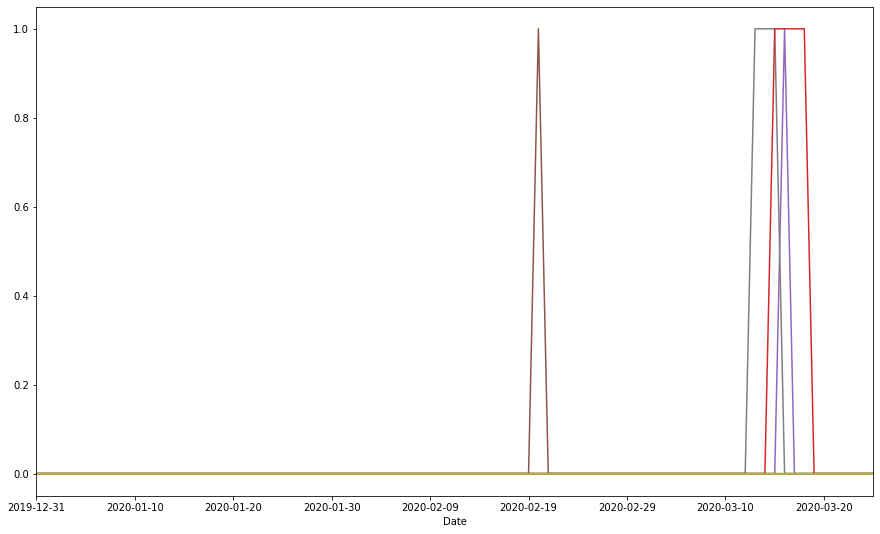

In [15]:
df_deaths_relative.plot(figsize=(15,9), legend=False)

In [41]:
df = df_cases_new.tail(4)
df = df.sum(axis=0)

countries_no_new_cases = df.loc[df == 0].index

df_countries_no_cases_new = df_cases_new[countries_no_new_cases]
df_countries_no_cases_total = df_cases_total[countries_no_new_cases]

df_countries_no_deaths_new = df_deaths_new[countries_no_new_cases]
df_countries_no_deaths_total = df_deaths_total[countries_no_new_cases]

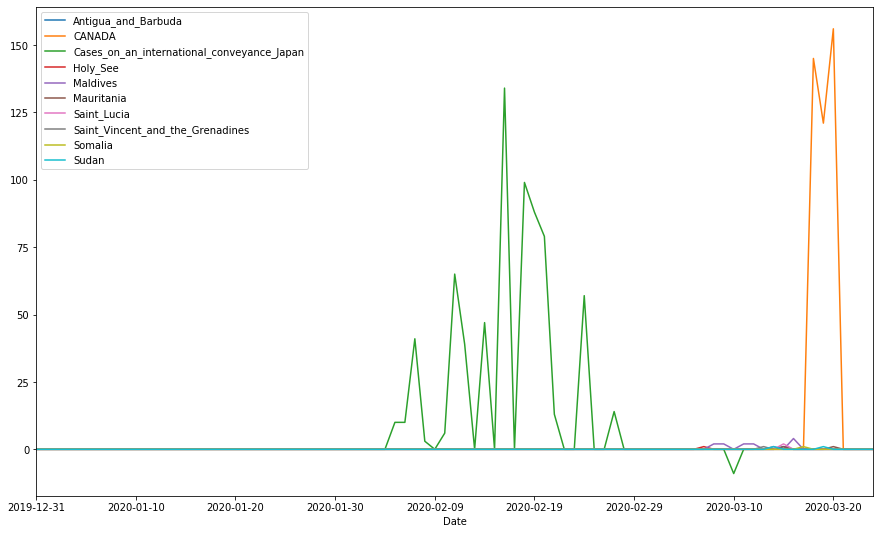

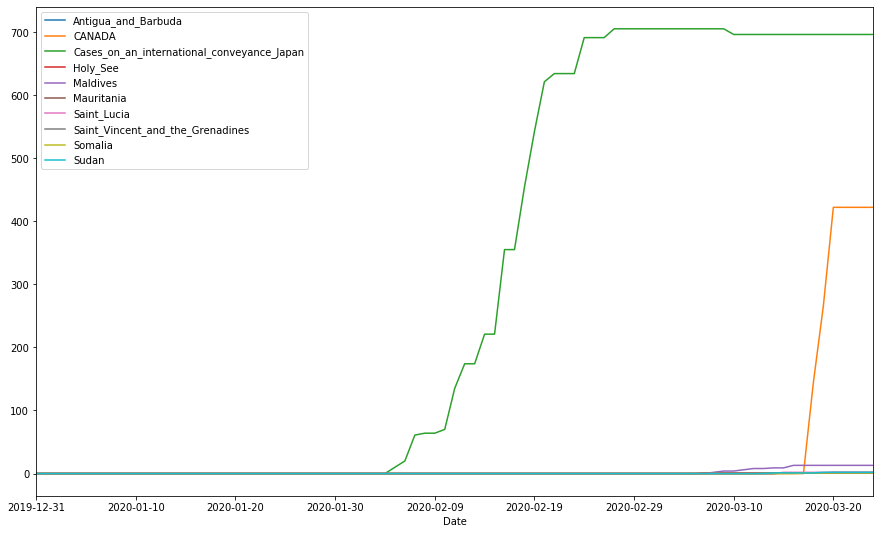

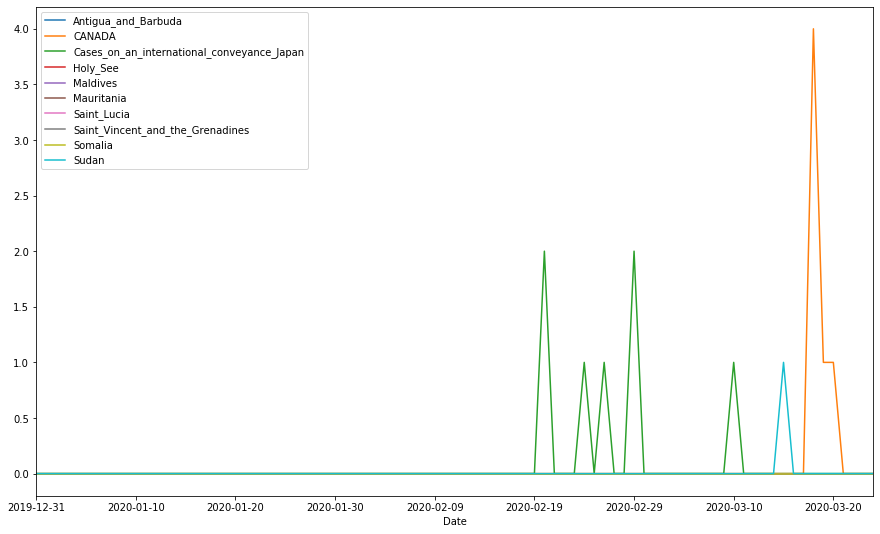

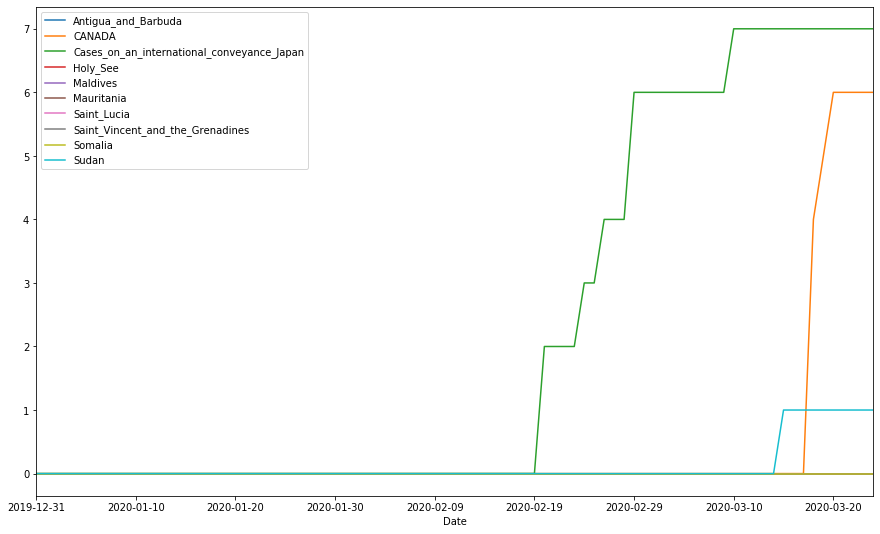

In [44]:
df_countries_no_cases_new.plot(figsize=(15,9))
plt.show()

df_countries_no_cases_total.plot(figsize=(15,9))
plt.show()

df_countries_no_deaths_new.plot(figsize=(15,9))
plt.show()

df_countries_no_deaths_total.plot(figsize=(15,9))
plt.show()